In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
#Use koi_disposition for the y values

y = df['koi_disposition']
X = df.drop(columns=["koi_disposition"], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.6 )

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(y_train) 

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_encoded

array([2, 1, 1, ..., 2, 2, 2])

In [6]:
code=pd.DataFrame({"Actual": y_test, "Encoded": y_test_encoded})
code.head(6)

,Actual,Encoded
4982,FALSE POSITIVE,2
4866,CANDIDATE,0
2934,FALSE POSITIVE,2
5007,FALSE POSITIVE,2
3869,FALSE POSITIVE,2
233,CONFIRMED,1


In [7]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.788
k: 3, Train/Test Score: 0.900/0.821
k: 5, Train/Test Score: 0.876/0.829
k: 7, Train/Test Score: 0.865/0.833
k: 9, Train/Test Score: 0.858/0.828
k: 11, Train/Test Score: 0.852/0.827
k: 13, Train/Test Score: 0.849/0.825
k: 15, Train/Test Score: 0.848/0.826
k: 17, Train/Test Score: 0.850/0.829
k: 19, Train/Test Score: 0.844/0.829
k: 21, Train/Test Score: 0.844/0.826
k: 23, Train/Test Score: 0.840/0.825
k: 25, Train/Test Score: 0.839/0.830
k: 27, Train/Test Score: 0.838/0.829
k: 29, Train/Test Score: 0.838/0.828
k: 31, Train/Test Score: 0.836/0.831
k: 33, Train/Test Score: 0.835/0.828
k: 35, Train/Test Score: 0.837/0.826
k: 37, Train/Test Score: 0.837/0.828
k: 39, Train/Test Score: 0.837/0.827
k: 41, Train/Test Score: 0.835/0.830
k: 43, Train/Test Score: 0.837/0.830
k: 45, Train/Test Score: 0.837/0.827
k: 47, Train/Test Score: 0.837/0.829
k: 49, Train/Test Score: 0.836/0.826


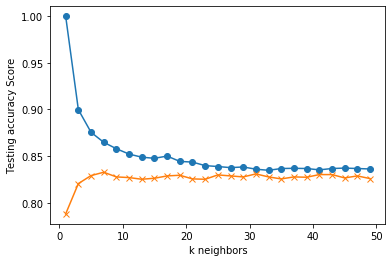

In [8]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_encoded)
    train_score = knn.score(X_train_scaled, y_train_encoded)
    test_score = knn.score(X_test_scaled, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# k:39 provides the best accuracy
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train_scaled, y_train_encoded)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_encoded))

k=9 Test Acc: 0.831


In [11]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.8359561278016213
Testing Data Score: 0.8308902395423668


In [12]:
from sklearn.metrics import classification_report

predictions = knn.predict(X_test_scaled)
print(classification_report(y_test_encoded, predictions,
                            target_names=[ 'Candidate', 'Confirmed', 'False Positive']))

                precision    recall  f1-score   support

     Candidate       0.72      0.51      0.60       672
     Confirmed       0.66      0.81      0.73       764
False Positive       0.98      1.00      0.99      1361

      accuracy                           0.83      2797
     macro avg       0.79      0.77      0.77      2797
  weighted avg       0.83      0.83      0.83      2797



In [13]:
predictions = knn.predict(X_test_scaled)

predictions_df=pd.DataFrame({"Actual": y_test_encoded, "Prediction": predictions })

results=predictions_df.apply(pd.Series.value_counts)
code = ['False Positive', 'Confirmed', 'Candidate',] 
results['Code']=code
results

,Actual,Prediction,Code
2,1361,1379,False Positive
1,764,943,Confirmed
0,672,475,Candidate


In [14]:
import joblib
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']